In [47]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [37]:
def plot_img(img, f_size=(10,10)):
    plt.figure(figsize=f_size)
    plt.imshow(img)
    
def plot_gray_img(img, f_size=(10,10)):
    if img.max() <= 1:
        arr = img * 255
    else:
        arr = img.astype(float)
    im = Image.fromarray(arr)
    
    plot_img(im, f_size)
    
PATH = './images/task_3/'

Function $obj$ works well for each image with the same parameters.

The $obj\_2$ function detects objects worse than the first one.

In [76]:
def obj(image):
    img = mpimg.imread(PATH + 'obj%s.jpg' % image)
    
    mask = np.zeros(img.shape[:2],np.uint8)
     
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    rect = (50,50,450,290)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    plot_img(img)

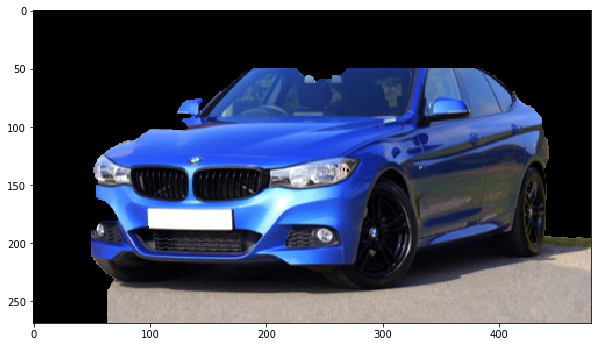

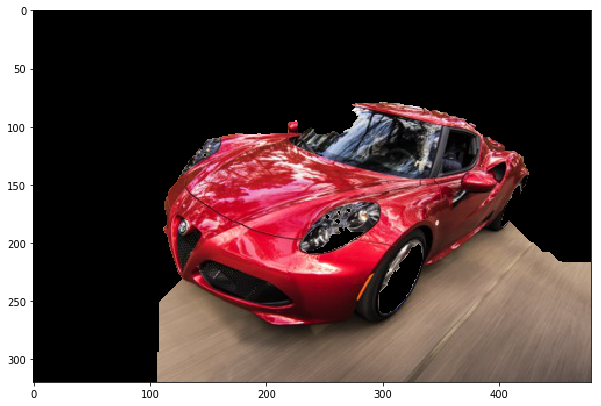

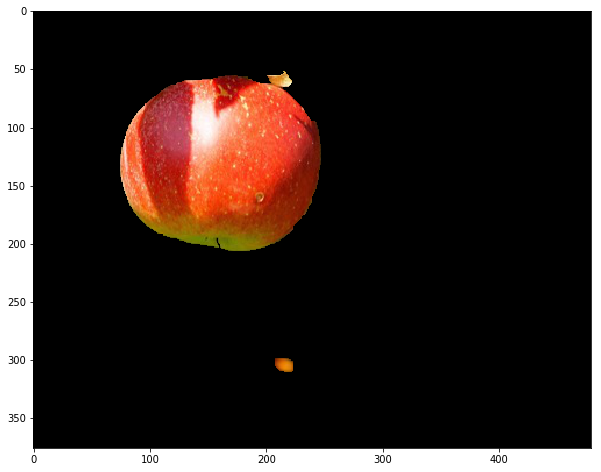

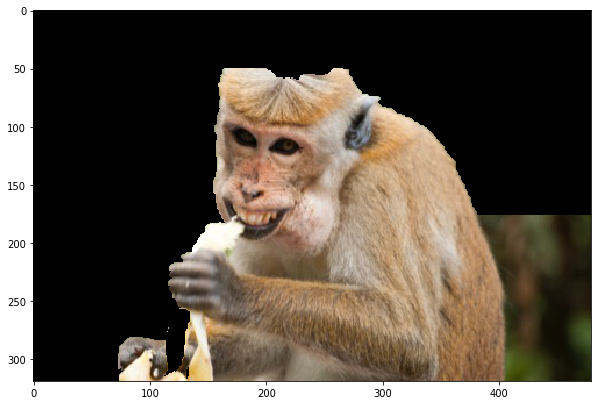

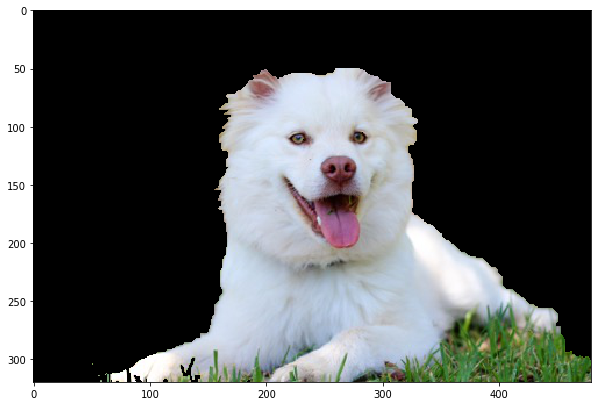

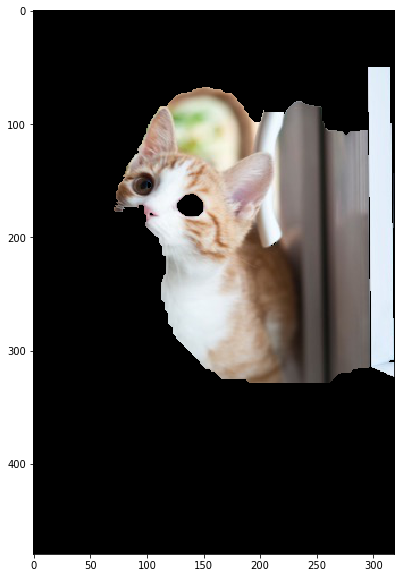

In [80]:
num = 6
for i in range(1,num + 1):
    obj(i)

In [82]:
def obj_2(image):
    img1 = mpimg.imread(PATH + 'obj%s.jpg' % image)
    
    img = cv2.resize(img1, (0,0), fx=1, fy=1) 

    (w,h) = img.shape[:2]
    mask = np.zeros( (w,h),np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (25,25,w-50,h-50)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]


    plot_img(img1)
    plot_gray_img(mask2*255)

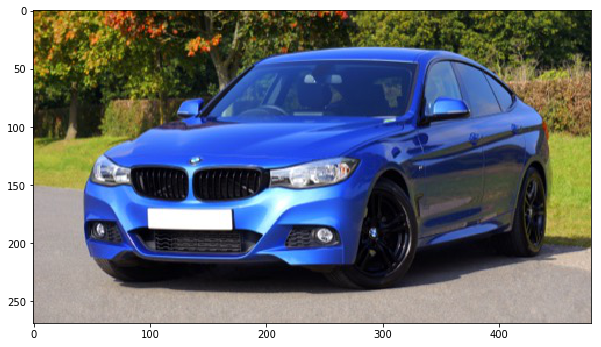

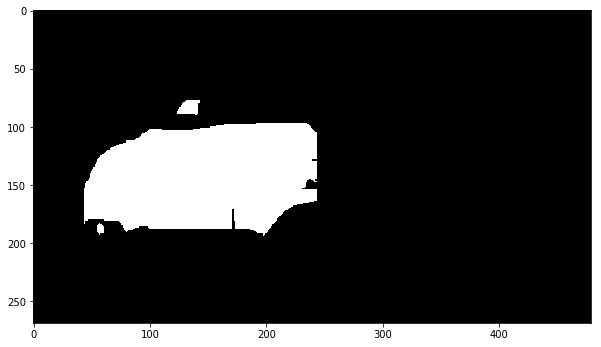

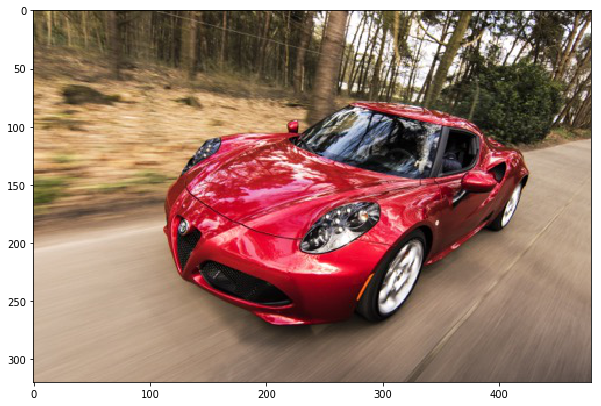

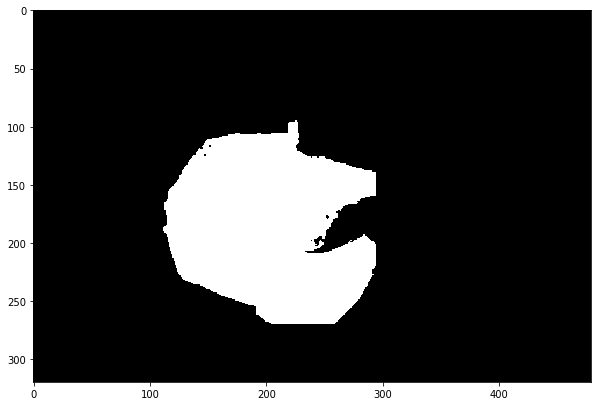

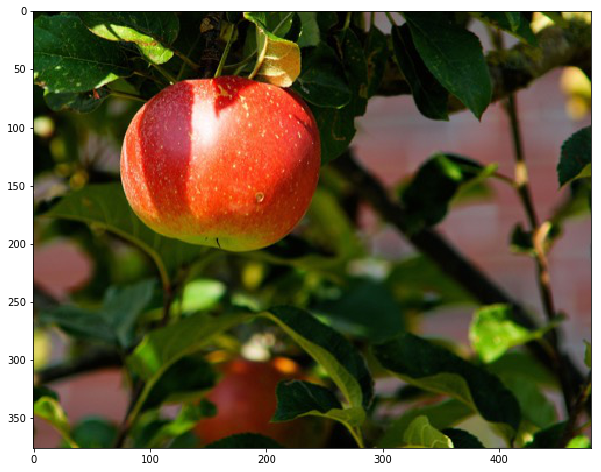

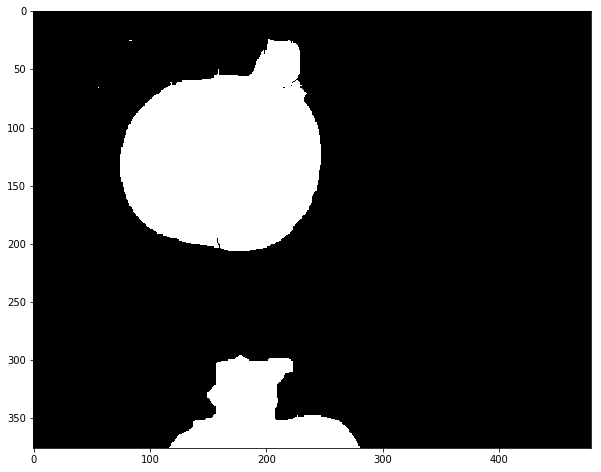

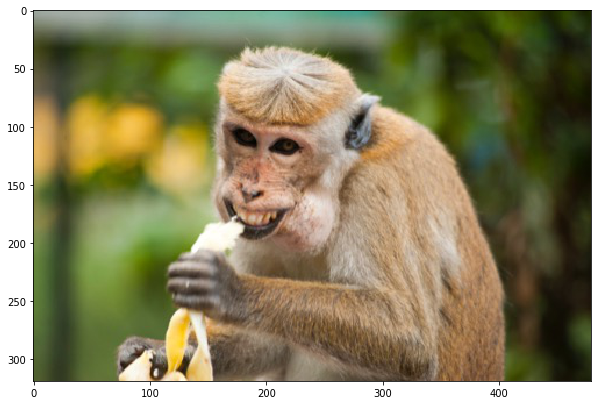

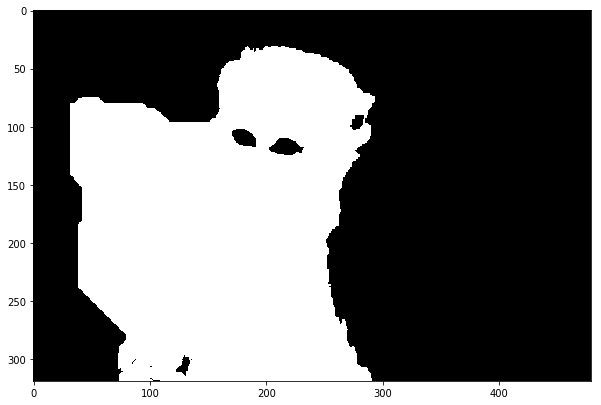

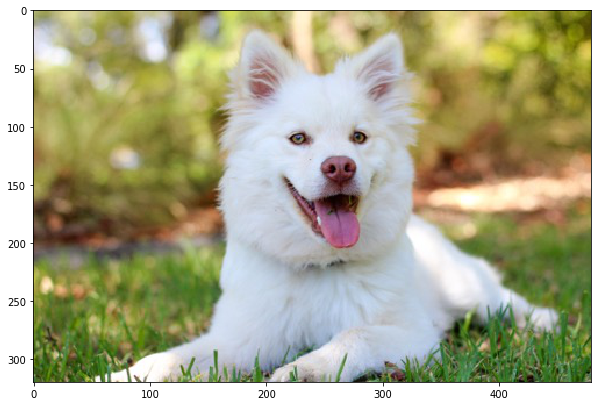

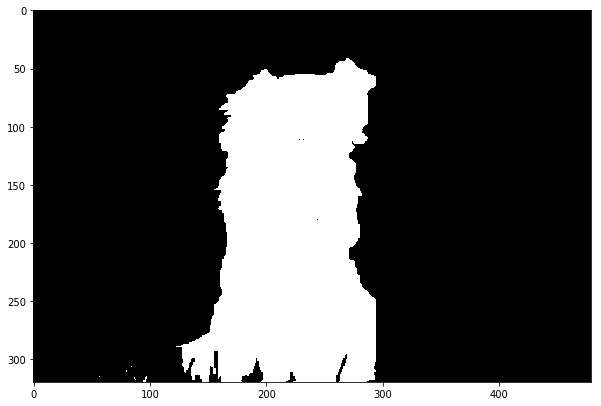

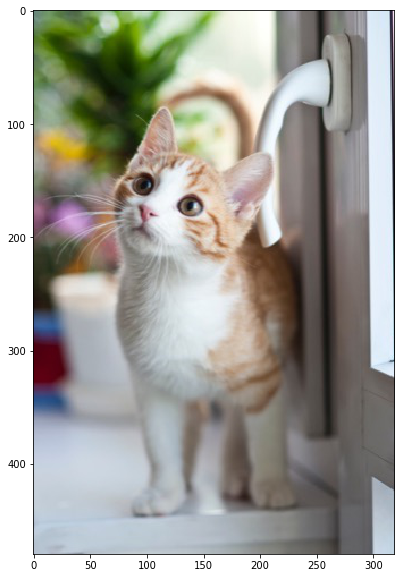

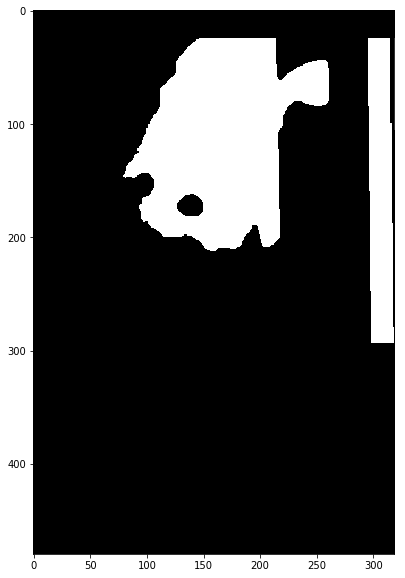

In [83]:
for i in range(1,num + 1):
    obj_2(i)